<a href="https://colab.research.google.com/github/Anjalikhillare/Bike-Sharing-Demand-Prediction/blob/main/Capstone_Project_2_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Bike Sharing Demand Prediction**


Project Type - Regression

Contribution - Individual

Team Member 1 -Anjali Khillare



## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


#**Project Summary**
Bike Sharing Demand Analysis is a regression problem which helps to predict the demand of the bikes for a particular time of the day. This project focus on predicting bike renting in different areas of a city during a future period based on historical data, weather data, and time data.
Although machine learning models are entirely data driven,I have tried to use social and economic elements to forecast demand for bike sharing.
To forecast consumer demand for bike sharing in Seoul, machine learning models are used. By integrating characteristics other than weather, such as air pollution, traffic data, and social economic considerations, it intended to extend prior research on bike sharing demand by improving prediction accuracy. 

#**GitHub Link**
https://github.com/Anjalikhillare/Bike-Sharing-Demand-Prediction

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility -Visibility measure
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing Libraries** 

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.read_csv('/content/drive/MyDrive/ML Project/seouldata.csv',encoding='latin-1')
df = pd.read_csv('/content/drive/MyDrive/ML Project/seouldata.csv',encoding='latin-1')

#**Data Summarization**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Dataset Rows & Columns count
df.count()
print(df.head())
 
# obtaining the shape
print("shape of dataframe", df.shape)
 
# obtaining the number of rows
print("# of rows : ", df.shape[0])
 
# obtaining the number of columns
print("# of columns : ", df.shape[1])

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#**Exploratory Data Analysis**

In [ ]:
df.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# % of null values in each column
round(df.isnull().sum()/len(df.index)*100)

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [ ]:
# Unique values 
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Duplicate Values
print(len(df[df.duplicated()]))

0


**Data Wrangling**

In [ ]:
# Converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# Splitting day of week, month and year into different columns
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type

In [ ]:
# Drop date column
df.drop(columns=['Date'],inplace=True)

In [ ]:
# Converting hour column from integer to categorical 
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Dividing data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


In [ ]:
# Categorical column value count
for i in categorical_features.columns:
  print('\n')
  print('column name  : ', i)
  print(df[i].value_counts())



column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64


column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64


column name  :  day_of_week
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64


column name  :  month
January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     

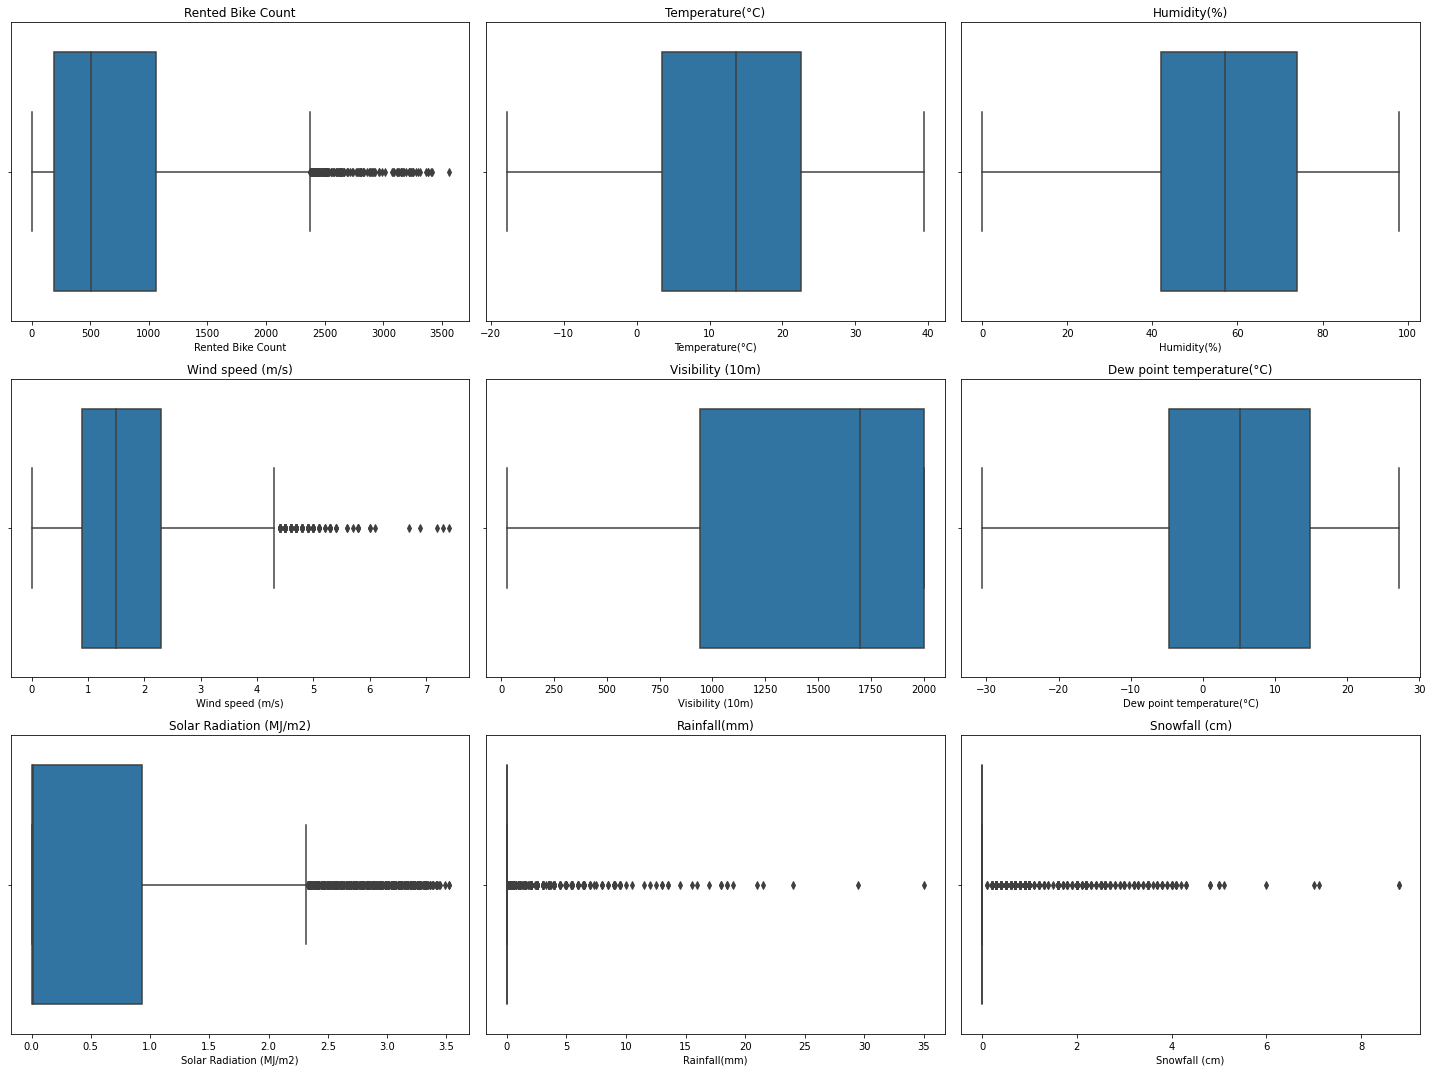

In [ ]:
# Outliers detection with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

Exploring categorical feature for some more information from the same

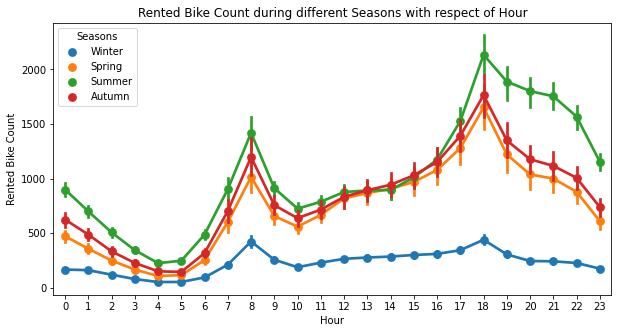

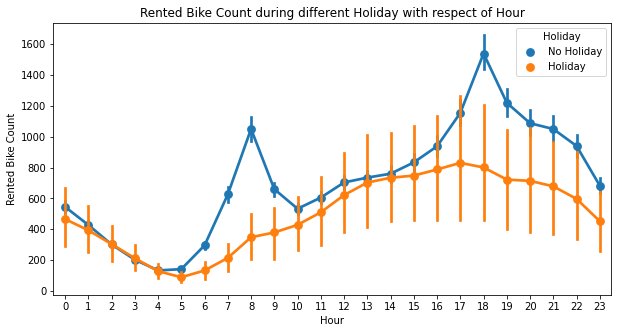

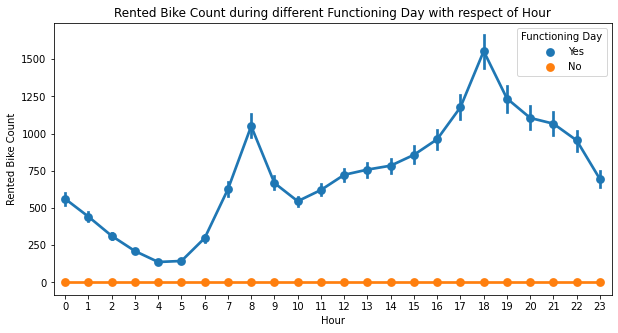

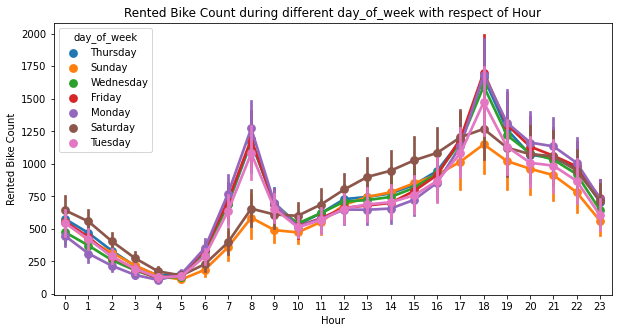

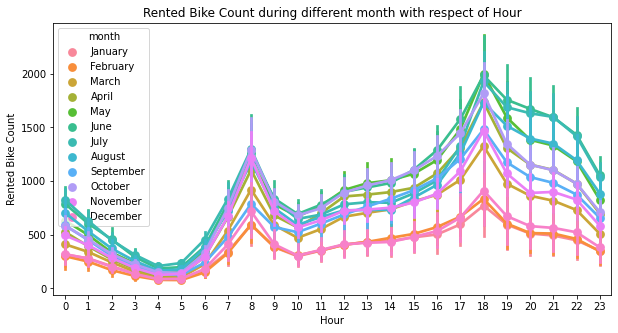

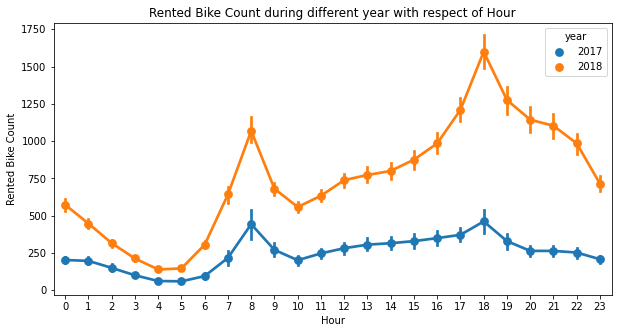

In [ ]:
# Point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

Exploring numerical feature information

Observation obtained from pointplot :

Season -In the season column,it is observed that the demand is low in the winter season.

Holiday-In the Holiday column, demand is low during holidays but strong during non-holiday times. This might be because many people commute to work on bicycles.

Functioning Day: If there is no entry in the Functioning Day column, then there is no demand.

Days of the week-In the Days of the week column,it is seen that the demand patterns on weekends are distinct from those on weekdays because they peak in the afternoon.

Month - In the month column, demand is lowest in December, January, and February because these are chilly months, as we already saw in the season column.

Year: Because it was new in 2017 and fewer people were aware of it, the demand was lower in 2017 and increased in 2018.

In [ ]:
# Converting days of weeks into weekdays and weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
# Week column value count
df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

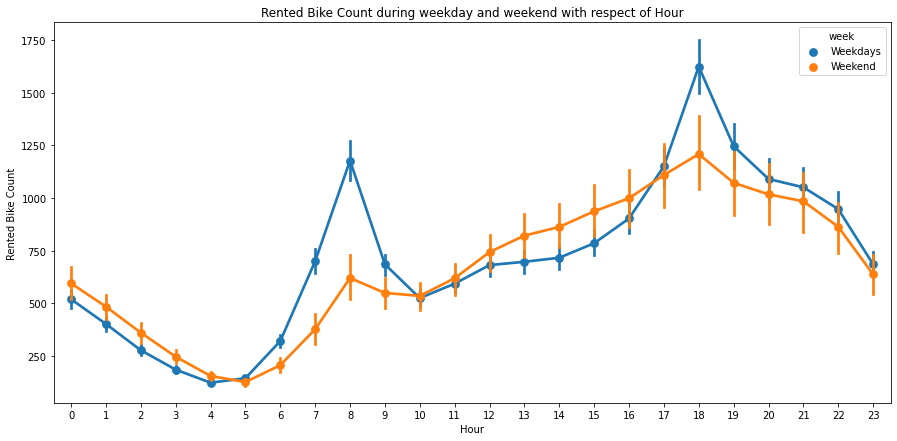

In [ ]:
# Week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

Now we can drop the days of week column

In [ ]:
# Droping days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

Now the time of explore our numerical feature and trying to take some important information from the Numeical feature

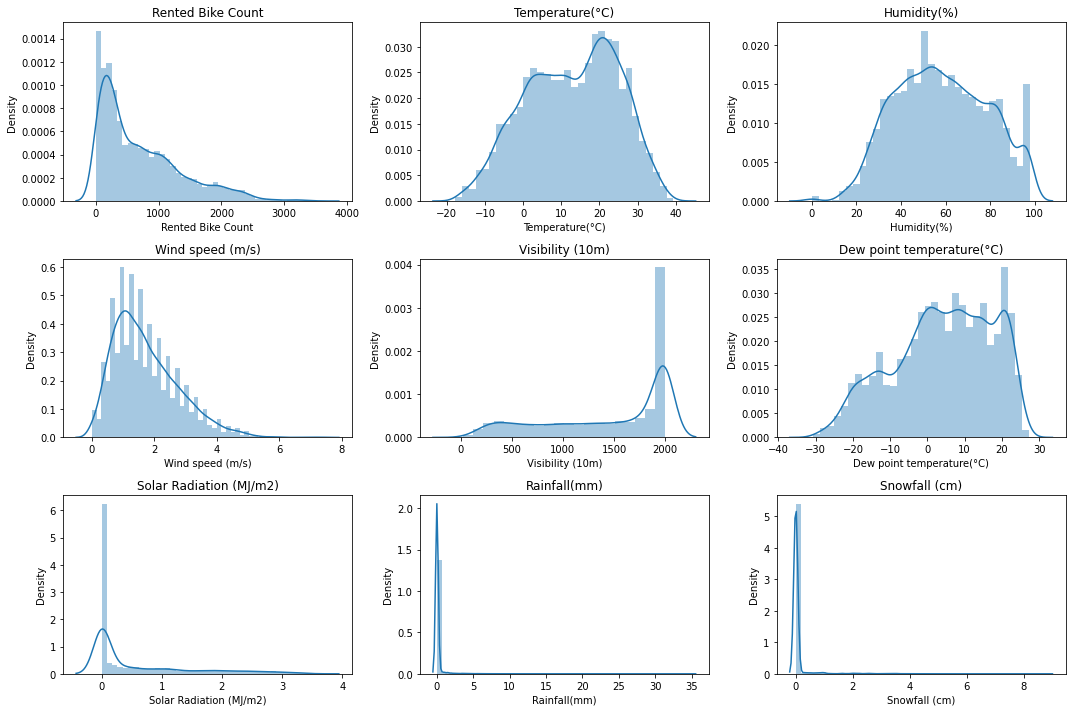

In [ ]:
# Data Distrubution 
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

In these plots we observe that some of our columns is right skewed and some are left skewed.Skewness is taken into consideration while applying algorithms.

Right skewed columns are

Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

Left skewed columns are

Visibility (10m), 
Dew point temperature(°C)


Information from Numerical features

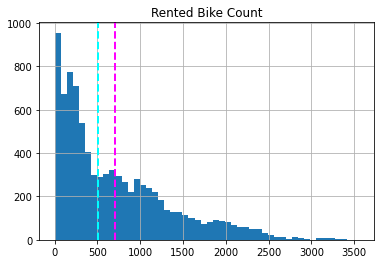

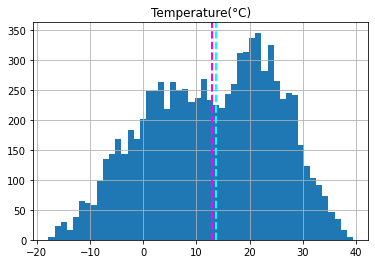

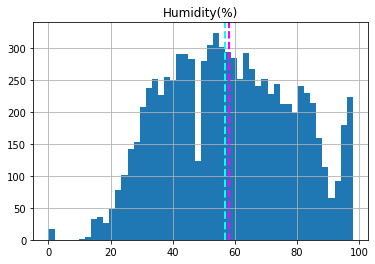

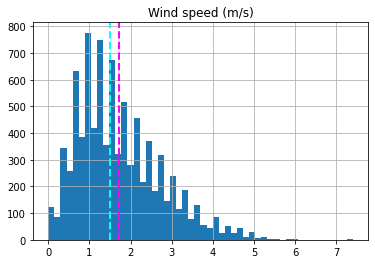

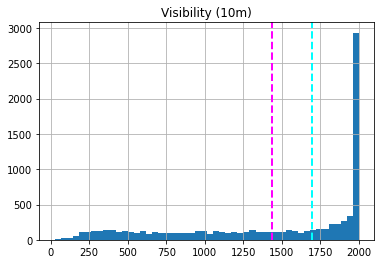

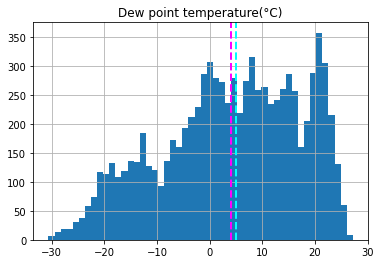

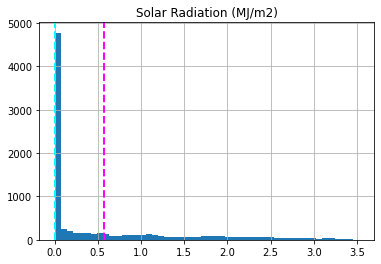

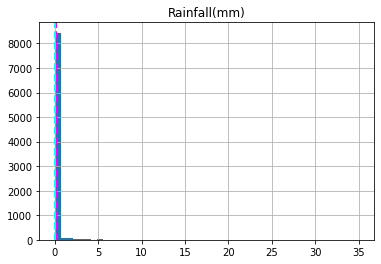

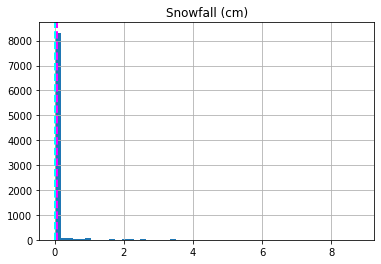

In [ ]:
# Histogram of numeric features
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

The skewness of the features with their skewed mean and median can be seen through the graphs.

Relation of numerical features with dependent variable

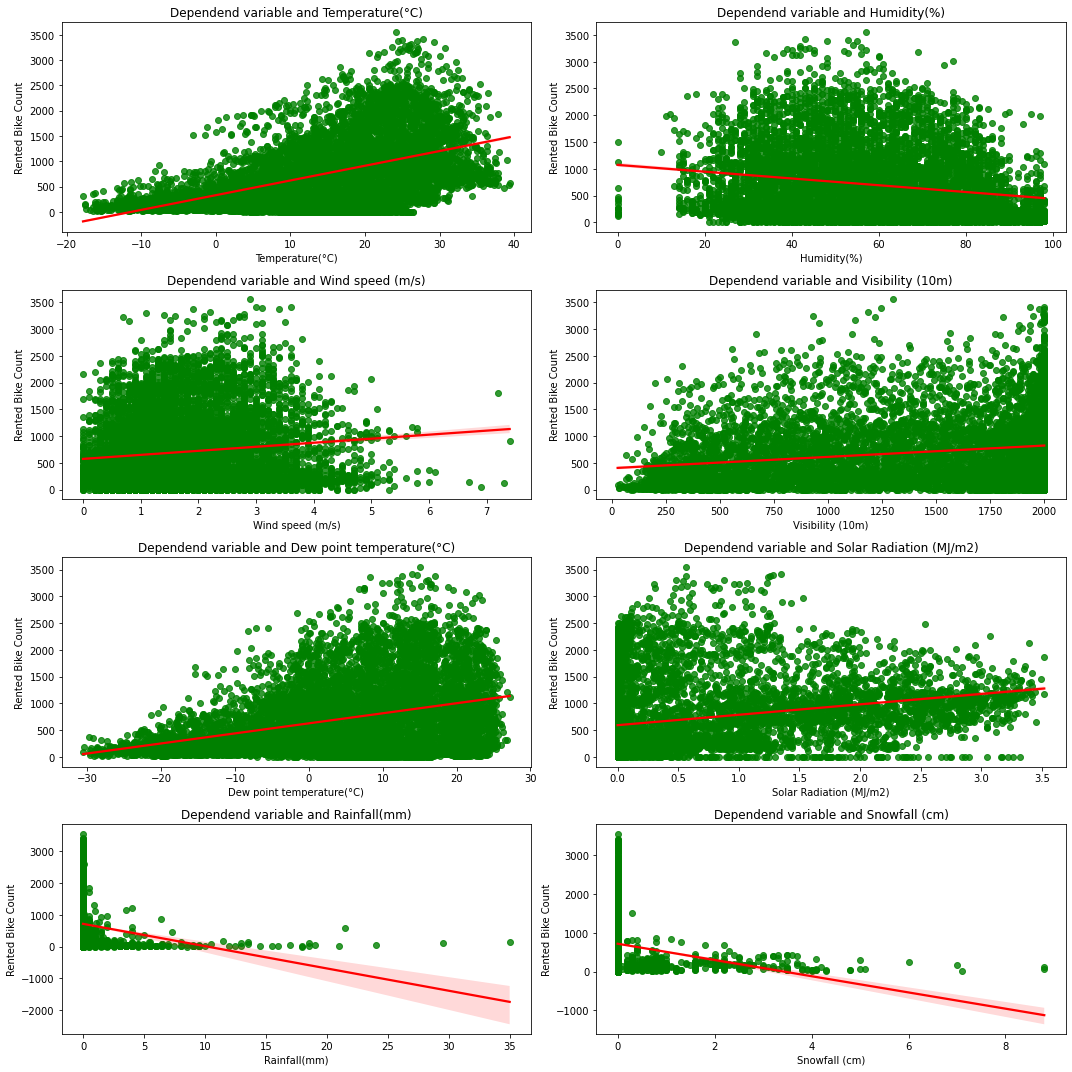

In [ ]:
# Regression plot of dependent and independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "green"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

Plots shows that some of the features are positive linear and some are negative linear with respect to target variable.

Correlation of dependent variable with the independent features

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

Correlation of all the numerical features via heatmap

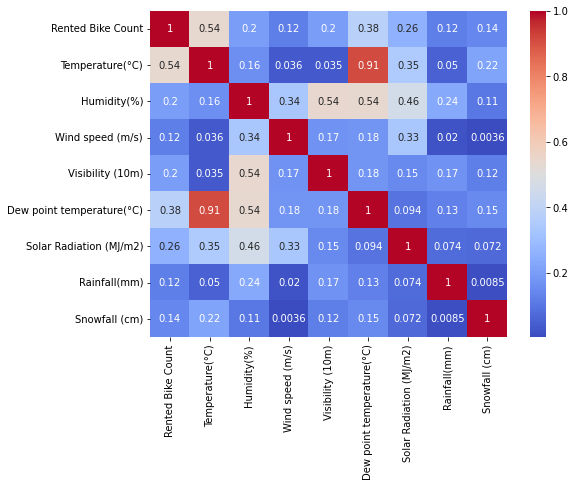

In [ ]:
# Correlation graph 
plt.figure(figsize=(8,6))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

From this graph it is observed that there is multicollinearity in temperature(°C) and dew point temperature(°C) column

**Multicollinearity**

The Variance Inflation Factor is the measure of multicollinearity that exists in the set of variables that are involved in multiple regressions

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [ ]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays


In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [ ]:
new_df.head(2)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0


It can be seen that dependent variable is right skewed, it needs to be normalized.Hence,normalization is performed.

Text(0.5, 1.0, 'Square root')

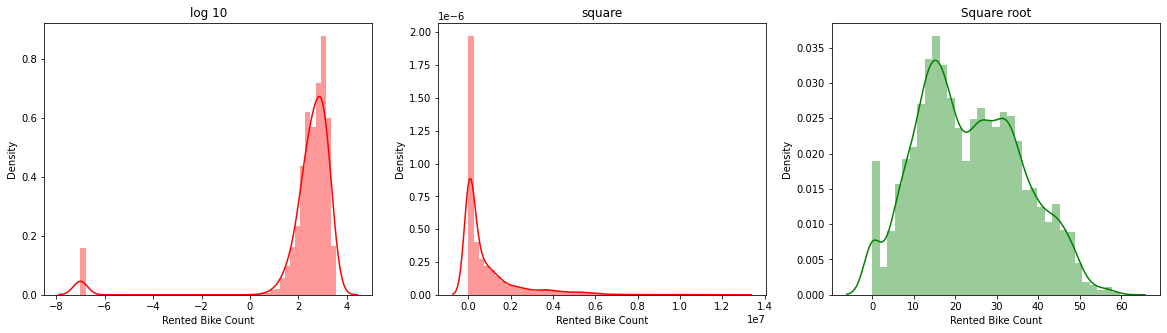

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

Normalization can be seen to some extent with square root on dependent variable.

Dependent feature and Independent feature

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)

X_train, X_test, y_train, y_test data

In [ ]:
x_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
8415,13.2,61,3.9,719,1.03,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
x_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
6056,27.2,69,1.8,1999,0.70,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5556,32.6,51,2.1,800,3.21,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5990,34.0,50,1.2,1744,1.68,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
7674,16.9,47,1.4,1637,0.11,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3319,6.4,51,1.0,1398,0.19,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train.head()

8415    31.543621
5049    34.568772
8395    38.052595
1535    13.341664
5518    44.497191
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7008, 48), (1752, 48), (7008,), (1752,))

Function to calculate score

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

Transforming X_train and X_test

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#**1.Linear Regression**

In [ ]:
# Train test spliting
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape


(6570, 48)


(2190, 48)

In [ ]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [ ]:
# Checking score
regg.score(X_train,y_train)

0.7570981422352079

In [ ]:
#Checking Coefficent
regg.coef_

array([ 4.66668504e-01, -1.39786884e-01, -1.37931870e-01,  5.55951090e-04,
        1.13518988e+00, -1.47062473e+00, -3.29050209e-02, -1.97647262e+00,
       -4.98593399e+00, -7.33431487e+00, -9.54690795e+00, -9.11761439e+00,
       -4.15527094e+00,  2.10913326e+00,  7.23101874e+00,  9.15563993e-01,
       -3.53450473e+00, -3.86469000e+00, -3.13548349e+00, -3.35575159e+00,
       -3.50647251e+00, -2.14812938e+00, -2.23230739e-02,  3.81813555e+00,
        1.02905629e+01,  6.87398208e+00,  6.22465895e+00,  6.33702247e+00,
        5.10445058e+00,  1.50066335e+00, -2.66916409e+00, -3.28339823e+00,
       -7.54459584e+00,  3.09469961e+00,  2.78177270e+01, -1.03450020e+00,
       -9.63569777e-02, -6.09795711e-01,  2.07410203e-01, -4.75338702e-01,
        4.05777997e+00, -3.88789053e-02,  1.17319617e+00,  7.08036454e-01,
        1.87061530e+00,  8.51324027e-02, -2.44863812e+00, -7.35041987e-01])

In [ ]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.40462195869229
RMSE : 6.115931814424707
MAE : 4.640641937260341
R2 : 0.7570981422352079
Adjusted R2 : 0.7516524209962028


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.41925790526358
RMSE : 6.034837023919004
MAE : 4.637779339922987
R2 : 0.7694493440753098
Adjusted R2 : 0.7642805297435092


In [ ]:
 # Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

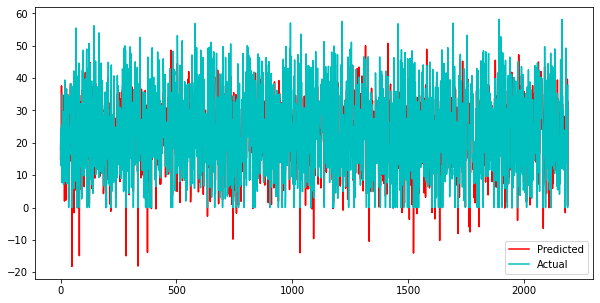

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test, color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

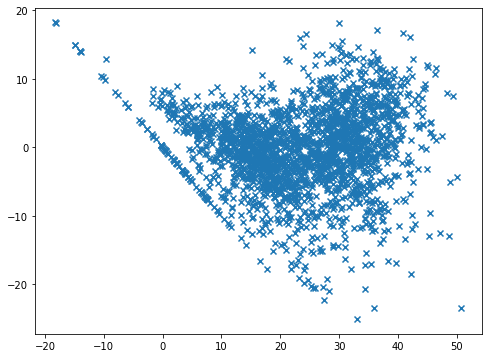

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

#**2.Ridge Regression**

In [ ]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score
ridge.score(X_train,y_train)

0.7570980571470578

In [ ]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.404635061474266
RMSE : 6.115932885625403
MAE : 4.640737154613935
R2 : 0.7570980571470578
Adjusted R2 : 0.7516523340004249


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.4210950127341
RMSE : 6.034989230540027
MAE : 4.638041725737001
R2 : 0.7694377143399256
Adjusted R2 : 0.7642686392760846


In [ ]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

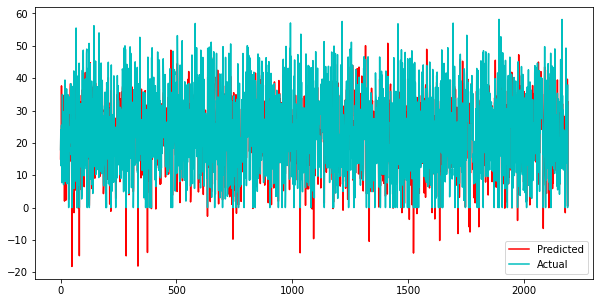

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_ridge, color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

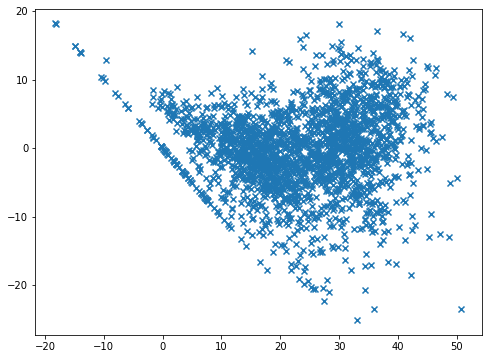

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

#**3.Lasso Regression**

In [ ]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3918610878883725


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.3736344484329298


In [ ]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

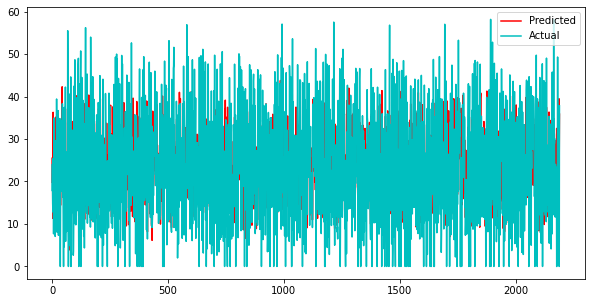

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_lasso, color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

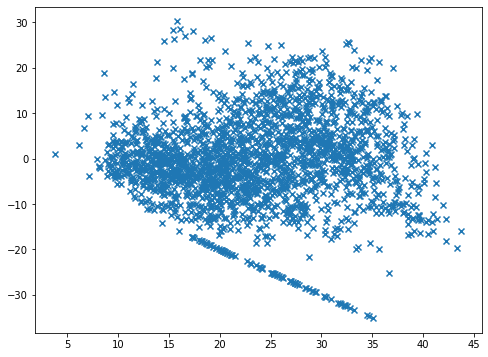

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),marker='x')

#**4.ElasticNet**

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elnet.score(X_train, y_train)

0.6153520884576871

In [ ]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 59.23219299694531
RMSE : 7.696245383103719
MAE : 5.8897300792389915
R2 : 0.6153520884576871
Adjusted R2 : 0.6067285014637445


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 61.63381803307848
RMSE : 7.850720860728553
MAE : 6.008679702825052
R2 : 0.6098295794045945
Adjusted R2 : 0.6010821809045573


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

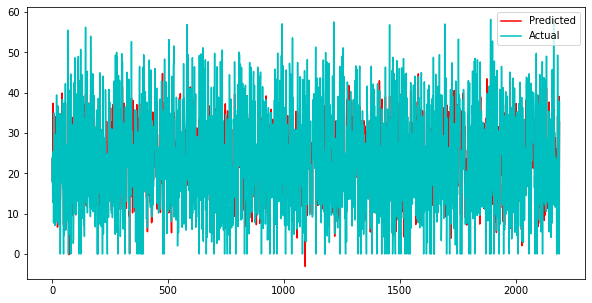

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test_en), color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

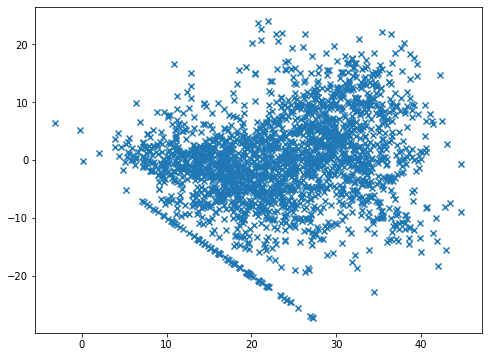

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

#**5.Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 61.99673289746601
RMSE : 7.8738004100603165
MAE : 5.760446303419389
R2 : 0.5973994440373543
Adjusted R2 : 0.5883733689854127


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 73.6780325994434
RMSE : 8.5835908918962
MAE : 6.252085267831856
R2 : 0.533584160686938
Adjusted R2 : 0.5231273833459633


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

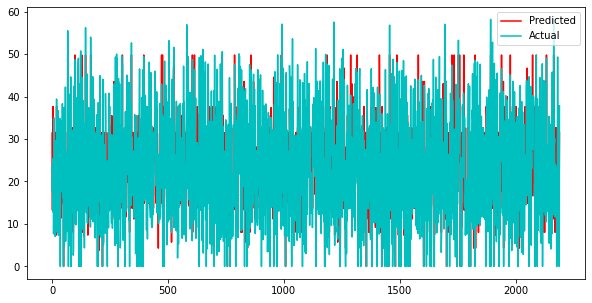

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_d, color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

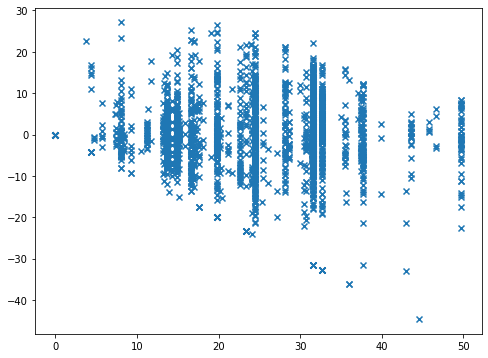

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

In [ ]:
# Feature importances
dt_regressor.feature_importances_

array([4.36994847e-01, 1.97178151e-01, 6.57563862e-03, 6.96731155e-03,
       7.96313190e-03, 7.37100805e-03, 1.04445588e-03, 0.00000000e+00,
       5.08140096e-03, 8.84053234e-03, 3.06725172e-02, 1.53779747e-02,
       0.00000000e+00, 2.36722628e-03, 9.03975780e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.12152636e-02, 2.19778179e-03, 9.66678494e-03, 1.62820842e-03,
       2.48497099e-04, 0.00000000e+00, 7.08248582e-02, 3.52817157e-03,
       0.00000000e+00, 0.00000000e+00, 4.88879614e-02, 0.00000000e+00,
       4.62493060e-04, 0.00000000e+00, 1.18144729e-03, 4.78211620e-04,
       1.62353209e-02, 0.00000000e+00, 2.00428935e-03, 2.07771441e-02,
       2.77117854e-02, 1.38320506e-02, 0.00000000e+00, 3.64577732e-03])

In [ ]:
features = X_train.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)

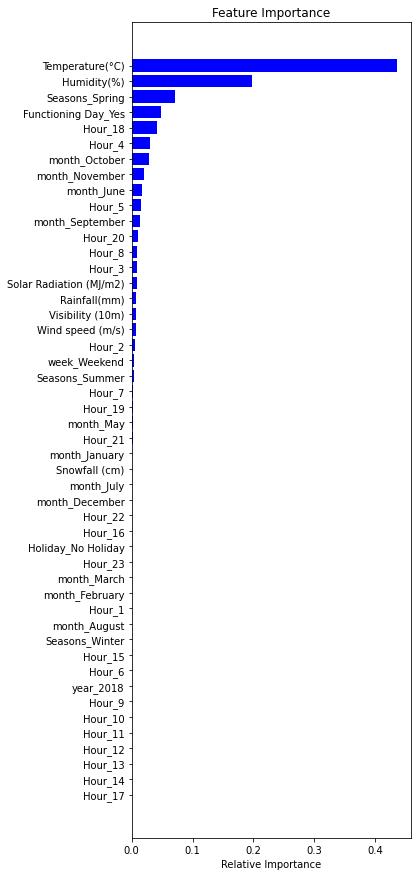

In [ ]:
#Plotting figure
plt.figure(figsize=(5,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**6.Random Forest Regression**

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.0379134301918795
RMSE : 1.4275550532963273
MAE : 0.9407895533207626
R2 : 0.9867659948895061
Adjusted R2 : 0.9864692960360247


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.881160518640357
RMSE : 3.9851173782763736
MAE : 2.551479866829821
R2 : 0.8994649483539132
Adjusted R2 : 0.8972110097836132


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

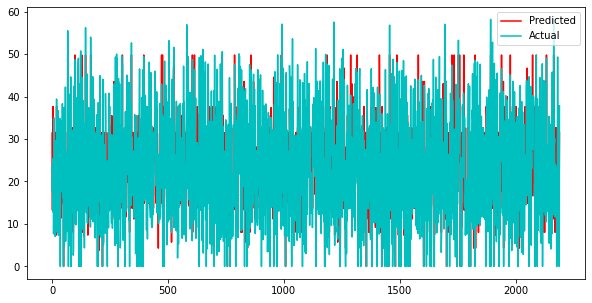

In [ ]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_d, color='r')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

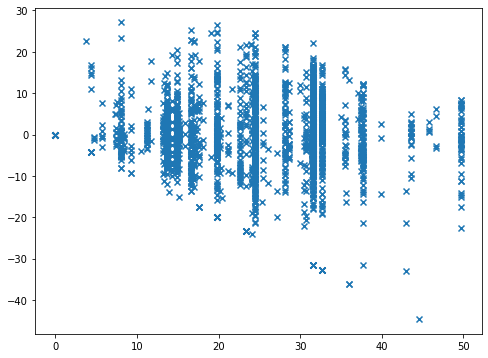

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

In [ ]:
# Feature importances
rf_model.feature_importances_

array([3.19936015e-01, 1.59506264e-01, 1.35862241e-02, 1.46393961e-02,
       3.23178223e-02, 3.34103894e-02, 1.10749527e-03, 4.65055010e-03,
       1.36295019e-02, 2.07889615e-02, 2.97064123e-02, 2.50215141e-02,
       8.10141108e-03, 3.63257403e-03, 1.30351537e-02, 8.65369023e-04,
       2.26312587e-03, 1.10528617e-03, 2.28803000e-04, 2.23300023e-04,
       3.73675646e-04, 1.37277370e-03, 3.78427581e-03, 1.02849827e-02,
       3.19371497e-02, 1.78838479e-02, 1.21041491e-02, 1.22012514e-02,
       9.37829613e-03, 3.71875076e-03, 6.11128556e-03, 1.34520611e-03,
       1.04626114e-02, 2.88328245e-03, 1.48978694e-01, 1.93262008e-03,
       7.24513360e-04, 1.00290524e-03, 1.20674142e-03, 1.20983410e-03,
       1.52522282e-03, 2.83140038e-03, 1.73043205e-03, 3.25675469e-03,
       1.68913886e-03, 1.79784836e-03, 9.45174915e-04, 9.57161192e-03])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

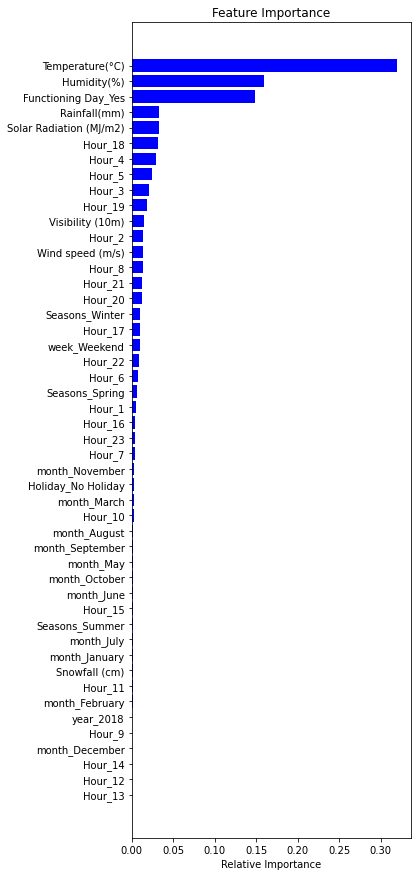

In [ ]:
#Plotting figure
plt.figure(figsize=(5,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**RESULT**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  Adj_R2
Training set 0        Linear regression   4.641  37.405  6.116  0.757    0.75
             1          Ridge regression  4.641  37.405  6.116  0.757    0.75
             2          Lasso regression  7.255  91.594  9.570  0.405    0.39
             3     Elasticnet regression  5.890  59.232  7.696  0.615    0.61
             4  Decision tree regression  5.760  61.997  7.874  0.597    0.59
             5  Random forest regression  0.941   2.038  1.428  0.987    0.99
Test set     0        Linear regression   4.638  36.419  6.035  0.769    0.76
             1          Ridge regression  4.638  36.421  6.035  0.769    0.76
             2          Lasso regression  7.456  96.775  9.837  0.387    0.37
             3     Elasticnet regression  6.009  61.634  7.851  0.610    0.60
             4  Decision tree regression  6.252  73.678  8.584  0.534    0.52
             5  Random forest regression  2.551  15.881  3.985  0.899    0.90

#**CONCLUSION**

Temperature holds as the most important feature for our selected Random Forest Regression model.

Bike rental count is high during working days as compared to non working days.

It is observed that people generally prefer bike during moderate to high temperature.

Linear and Ridge: Linear and Ridge models have almost similar R2 scores(around 75%) on both training and test data. 

Lasso: Lasso proved to be the weakest model of all with R2  value of  0.405

ElasticNet: The value of R2 for this model was 0.615

Decision Tree Regression : On Decision tree regressor model, R2 value is 0.597 on training data and on test data it was very less with 0.534 as its R2 value. 
Random Forest: On Random Forest regressor model, R2 value is 0.987 on training data and around 90% on test data.

The method that proved to be most effective for predicting the hourly demand for rental bikes was Random Forest. The result was an adjusted R2 value of 0.99.

The most significant factors in determining the hourly demand for rental bikes was found to be temperature.


#**THANK YOU**